In [47]:
import csv

f = open('subwayuses2020-09.csv')
data = csv.reader(f)
time = next(data)
next(data)
a = []

for row in data:
    for i in range(4,52) :
        row[i] = int(row[i].replace(',',''))
    a.append(row)


# 1

In [48]:
max = -9999
x = 0
y = 4
b = []

for i in a[0:]:
    y = 4
    for j in i[4:51:2]:
        if j > max:
            max = j
            b += [x, y]
        y += 2
    x += 1


In [49]:
b[-2:]

[31, 32]

b의 제일 마지막 2개 항목이 승차승객이 가장 많은 역과 시간대이다.

In [50]:
print('승차승객 수가 가장 많은 역과 시간대\n','역 이름:', a[b[-2]][3]+ ', 시간대:', time[b[-1]])


승차승객 수가 가장 많은 역과 시간대
 역 이름: 강남, 시간대: 18:00:00~18:59:59


# 2

In [51]:
max = -9999
x = 0
y = 5
b = []

for i in a[0:]:
    y = 5
    for j in i[5:51:2]:
        if j > max:
            max = j
            b += [x, y]
        y += 2
    x += 1

In [52]:
b[-2:]

[507, 13]

하차 시간대는 time에서 해당항목이 공란이라 -1을 한다

In [53]:
print('하차승객 수가 가장 많은 역과 시간대\n','역 이름:', a[b[-2]][3]+ ', 시간대:', time[b[-1]-1])

하차승객 수가 가장 많은 역과 시간대
 역 이름: 가산디지털단지, 시간대: 08:00:00~08:59:59


# 3

In [54]:
import csv

f = open('subwayuses2020-09.csv')
data = csv.reader(f)
time = next(data)
next(data)
a = []
plustation = []
for row in data:
    for i in range(4,52) :
        row[i] = int(row[i].replace(',',''))
    for i in a:
        if row[3] == i[3]:
            for plus in (4, 52):
                i[plus] += row[plus] # 동일한 이름을 가진 다른 호선의 역(환승역)의 각각의 시간대의 승하차 인원을 더함
            
    a.append(row)

출근시간(8,15)
퇴근시간(30, 35)



In [55]:
max = -9999
x = 0
y = 8
b = []

for i in a[0:]:
    y = 8
    for j in i[8:16:2]:
        if j > max:
            max = j
            b += [x, y]
        y += 2
    x += 1

In [56]:
print('출근시간 대에 승차승객 수가 가장 많은 역:', a[b[-2]][3])

출근시간 대에 승차승객 수가 가장 많은 역: 신림


In [57]:
max = -9999
x = 0
y = 9
b = []

for i in a[0:]:
    y = 9
    for j in i[9:16:2]:
        if j > max:
            max = j
            b += [x, y]
        y += 2
    x += 1

In [58]:
print('출근시간 대에 하차승객 수가 가장 많은 역:', a[b[-2]][3])

출근시간 대에 하차승객 수가 가장 많은 역: 가산디지털단지


# 4

In [59]:
max = -9999
x = 0
y = 30
b = []

for i in a[0:]:
    y = 30
    for j in i[30:36:2]:
        if j > max:
            max = j
            b += [x, y]
        y += 2
    x += 1

In [60]:
print('퇴근시간 대에 승차승객 수가 가장 많은 역:', a[b[-2]][3])

퇴근시간 대에 승차승객 수가 가장 많은 역: 강남


In [61]:
max = -9999
x = 0
y = 31
b = []

for i in a[0:]:
    y = 31
    for j in i[31:36:2]:
        if j > max:
            max = j
            b += [x, y]
        y += 2
    x += 1

In [62]:
print('퇴근시간 대에 하차승객 수가 가장 많은 역:', a[b[-2]][3])

퇴근시간 대에 하차승객 수가 가장 많은 역: 신림


# 5

In [63]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

f = open('subwayuses2020-09.csv')
data = csv.reader(f)
time = next(data)
next(data)
a = []
#

for row in data:
    if row[1] == '4호선':
        a.append(row)
    elif row[1] == '과천선':
        a.append(row)
    elif row[1] == '안산선':
        a.append(row)
    for i in range(4,52) :
        row[i] = int(row[i].replace(',',''))

In [64]:
b = []
for i in a:
    b.append([i[3], i[30], i[32], i[34]])

In [65]:
c = pd.DataFrame(b)
c.set_index(0,inplace=True)
c = c.reindex(index=['당고개', '상계', '노원', '창동', '쌍문', '수유(강북구청)', '미아(서울사이버대학)', '미아사거리', 
                     '길음', '성신여대입구(돈암)', '한성대입구(삼선교)', '혜화', '동대문', '동대문역사문화공원(DDP)', 
                     '충무로', '명동', '회현(남대문시장)', '서울역', '숙대입구(갈월)', '삼각지', '신용산', 
                     '이촌(국립중앙박물관)', '동작(현충원)', '총신대입구(이수)', '사당', '남태령', '선바위', 
                     '경마공원', '대공원', '과천', '정부과천청사', '인덕원', '평촌', '범계', '산본', '수리산', '대야미', 
                     '반월', '상록수', '한대앞', '중앙', '고잔', '초지', '안산', '신길온천', '정왕', '오이도'])

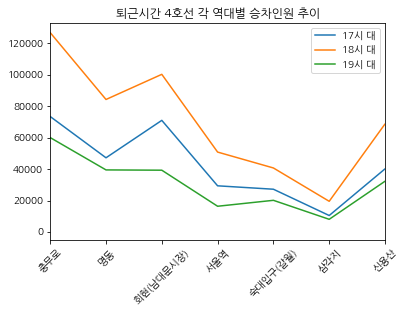

In [66]:
plt.rc('font', family='NanumGothic')
plt.title('퇴근시간 4호선 각 역대별 승차인원 추이') 
plt.plot(c[1], label='17시 대')
plt.plot(c[2], label='18시 대')
plt.plot(c[3], label = '19시 대')
plt.xticks(rotation=45)
plt.xlim([14, 20])
plt.legend() 
plt.show()

# 개인적 해석
특정 목표를 가지고 시간을 특정한 것이 아니라 유의미한 정보를 찾기는 힘들지만 단순히 보자면 충무로와 인덕원역에서 높은 이용률이 보이는데 18시와 19시의 이용객수의 차이가 큰 것을 보아 그 부근의 직장인들의 퇴근이 대부분은 18시 경에 이루어진다고 볼 수 있으며, 직장인이 아니라면 거주민들이 약속으로 인한 만남을 위해 주거지역을 떠난다고 볼 수 있는데 최근 코로나 사태로 이 경우 많은 부분을 차지한다고는 볼 수 없다고 생각한다. 해당 시간에 퇴근이 많은 것은 주 52시간 근무제로 인한 영향으로 보인다.

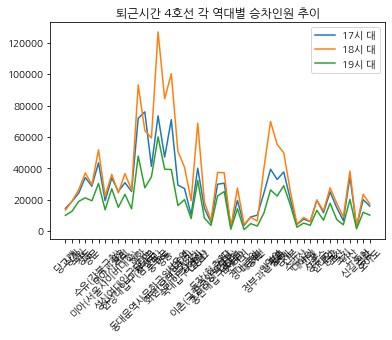

In [67]:
plt.rc('font', family='NanumGothic')
plt.title('퇴근시간 4호선 각 역대별 승차인원 추이') 
plt.plot(c[1], label='17시 대')
plt.plot(c[2], label='18시 대')
plt.plot(c[3], label = '19시 대')
plt.xticks(rotation=45)
plt.legend() 
plt.show()